# Table of contents

• Revisiting duplicates and missing variables

• Column Frequencies

• Column value counts to put in final project tab 5

• Bar chart for number of orders by day of week

• Histogram for pricing frequency

• 70/30 Split

• Histogram on 'order_hour_of_day' column using 24 bins for 24 hours in a day

• Bar chart from 'loyalty_flag' column showing number of customers for each flag

• Line chart for the average item price per hour

• Line chart for average number of dependents by customer age

• Scatterplot that plots prices against prices to look for anomolies

• Scatterplot of the entire merged data frame plotting age and income

• Line chart for average price per item by day of week


In [1]:
#Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import scipy

In [2]:
path = r'/Users/lupeguevara/Documents/Instacart Basket Analysis'

In [3]:
path

'/Users/lupeguevara/Documents/Instacart Basket Analysis'

In [4]:
#Import data set

orders_products_include = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_cust_all.pkl'))

In [5]:
#Checking data frame

orders_products_include.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,region,low_activity,department_name,age_flag,avg_income,income_flag,avg_dependant,depend_flag,customer_profile,price_range_loc
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,South,False,beverages,Young,40423.0,Low income,3.0,With Dependants,Young_Low income_With Dependants,Mid-range product
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,South,False,beverages,Young,40423.0,Low income,3.0,With Dependants,Young_Low income_With Dependants,Mid-range product
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,South,False,beverages,Young,40423.0,Low income,3.0,With Dependants,Young_Low income_With Dependants,Mid-range product
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,South,False,beverages,Young,40423.0,Low income,3.0,With Dependants,Young_Low income_With Dependants,Mid-range product
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,South,False,beverages,Young,40423.0,Low income,3.0,With Dependants,Young_Low income_With Dependants,Mid-range product


In [6]:
orders_products_include.shape

(32434212, 41)

In [7]:
#Search for missing values

orders_products_include.isnull().sum()

order_id                        0
user_id                         0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078084
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                28171
aisle_id                        0
department_id                   0
prices                          0
Busiest day                     0
Busy_slow_days                  0
busiest_period_of_day           0
max_order                       0
loyalty_flag                    0
average_price                   0
spending_flag                   0
median_days                     0
order_frequency_flag            0
first_name                      0
last_name                       0
gender                          0
state                           0
age                             0
number_of_dependents            0
family_status                   0
income        

In [8]:
#Search for duplicates

orders_products_include[orders_products_include.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,region,low_activity,department_name,age_flag,avg_income,income_flag,avg_dependant,depend_flag,customer_profile,price_range_loc
781446,501707,137438,2,4,19,15.0,35491,20,0,Adore Forever Body Wash,...,South,False,personal care,Young,66239.0,Low income,0.0,Without Dependants,Young_Low income_Without Dependants,Mid-range product
781448,2164186,137438,3,0,13,24.0,35491,16,1,Adore Forever Body Wash,...,South,False,personal care,Young,66239.0,Low income,0.0,Without Dependants,Young_Low income_Without Dependants,Mid-range product
781450,1705755,137438,6,2,18,5.0,35491,4,1,Adore Forever Body Wash,...,South,False,personal care,Young,66239.0,Low income,0.0,Without Dependants,Young_Low income_Without Dependants,Mid-range product
781452,1717289,137438,8,0,12,4.0,35491,4,1,Adore Forever Body Wash,...,South,False,personal care,Young,66239.0,Low income,0.0,Without Dependants,Young_Low income_Without Dependants,Mid-range product
781454,2740657,137438,10,4,19,10.0,35491,7,1,Adore Forever Body Wash,...,South,False,personal care,Young,66239.0,Low income,0.0,Without Dependants,Young_Low income_Without Dependants,Mid-range product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32057000,2146998,164461,5,1,16,28.0,35306,3,0,Gluten Free Organic Peanut Butter & Chocolate ...,...,South,False,breakfast,Old,51796.0,Low income,3.0,With Dependants,Old_Low income_With Dependants,Mid-range product
32057002,2003479,164461,6,2,15,8.0,35306,2,1,Gluten Free Organic Peanut Butter & Chocolate ...,...,South,False,breakfast,Old,51796.0,Low income,3.0,With Dependants,Old_Low income_With Dependants,Mid-range product
32279971,3312521,162175,1,4,14,NaN,35306,8,0,Gluten Free Organic Peanut Butter & Chocolate ...,...,Northeast,True,breakfast,Young,37546.0,Low income,2.0,With Dependants,Young_Low income_With Dependants,Mid-range product
32304540,294782,42191,7,4,8,7.0,18458,8,0,Ranger IPA,...,Midwest,False,alchol,Middle,97017.0,Middle income,0.0,Without Dependants,Middle_Middle income_Without Dependants,Mid-range product


In [9]:
orders_products_include = orders_products_include.drop_duplicates()

In [10]:
orders_products_include.shape

(32433030, 41)

In [11]:
#Frequencies of flag columns

orders_products_include.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'Busiest day', 'Busy_slow_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spending_flag', 'median_days',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'number_of_dependents', 'family_status', 'income', '_merge',
       'region', 'low_activity', 'department_name', 'age_flag', 'avg_income',
       'income_flag', 'avg_dependant', 'depend_flag', 'customer_profile',
       'price_range_loc'],
      dtype='object')

In [12]:
orders_products_include['busiest_period_of_day'].value_counts()

busiest_period_of_day
Most orders       21136476
Average orders    10006413
Fewest orders      1290141
Name: count, dtype: int64

In [13]:
21136476+10006413+1290141

32433030

In [14]:
orders_products_include['price_range_loc'].value_counts()

price_range_loc
Mid-range product     21889009
Low-range product     10126339
High-range product      417682
Name: count, dtype: int64

In [15]:
21889009+10126339+417682

32433030

In [16]:
orders_products_include['Busiest day'].value_counts()

Busiest day
Regularly busy    22436578
Busiest day        6209410
Least busy         3787042
Name: count, dtype: int64

In [17]:
22436578+6209410+3787042

32433030

In [18]:
orders_products_include['busiest_period_of_day'].value_counts()

busiest_period_of_day
Most orders       21136476
Average orders    10006413
Fewest orders      1290141
Name: count, dtype: int64

In [19]:
21136476+10006413+1290141

32433030

In [20]:
orders_products_include['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    15890458
Loyal customer      10293434
New customer         6249138
Name: count, dtype: int64

In [21]:
15890458+10293434+6249138

32433030

In [22]:
orders_products_include['spending_flag'].value_counts()

spending_flag
Low spender     31797576
High spender      635454
Name: count, dtype: int64

In [23]:
31797576+635454

32433030

In [24]:
orders_products_include['order_frequency_flag'].value_counts(dropna=False)

order_frequency_flag
Frequent customer        21576698
Regular customer          7216805
Non-frequent customer     3639527
Name: count, dtype: int64

In [25]:
21576698+7216805+3639527

32433030

In [26]:
orders_products_include['number_of_dependents'].value_counts()

number_of_dependents
3    8142050
0    8104841
2    8098134
1    8088005
Name: count, dtype: int64

In [27]:
8142050+8104841+8098134+8088005

32433030

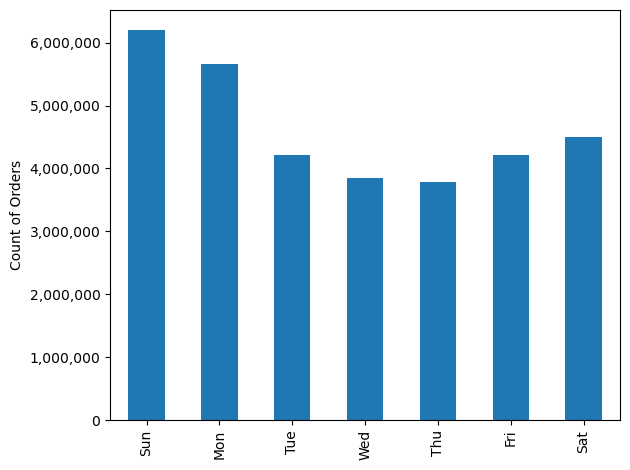

In [28]:
#Create bar chart for number of orders by day of week.

bar = orders_products_include['order_dow'].value_counts().sort_index().plot.bar()

#Set custom axis labels
bar.set_xlabel("")  # Set an empty string as the x-axis label
bar.set_ylabel("Count of Orders")

#Customize the x-axis ticks and labels
custom_xticks = range(7)  # Define your custom tick positions (e.g., for days of the week)
custom_xlabels = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]  # Define your custom tick labels

bar.set_xticks(custom_xticks)
bar.set_xticklabels(custom_xlabels)

#Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format as integers with thousands separators

bar.yaxis.set_major_formatter((format_func))

plt.tight_layout()

# Show the plot
plt.show()

In [29]:
# Saving the bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

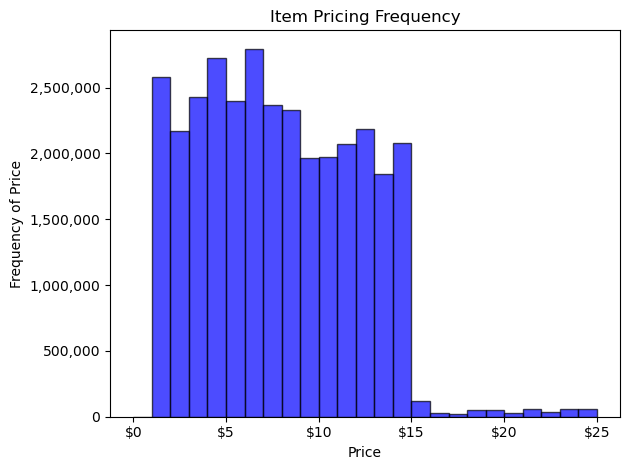

In [30]:
#Histogram for pricing frequency

#Define custom bin edges to create separated bars
bins = np.arange(0, 26, 1)

#Creating a histogram with custom bin edges
hist = orders_products_include['prices'].plot.hist(bins=bins, edgecolor='k', alpha=0.7, color='b')

#Set custom axis labels
hist.set_xlabel("Price")
hist.set_ylabel("Frequency of Price")

#Add a title to the histogram
hist.set_title("Item Pricing Frequency")

#Customize the x-axis ticks and labels
custom_xticks = [0, 5, 10, 15, 20, 25] 
custom_xlabels = ["$0", "$5", "$10", "$15", "$20", "$25"] 

hist.set_xticks(custom_xticks)
hist.set_xticklabels(custom_xlabels)

# Format x-axis tick labels as dollars
def format_dollars(value, tick_number):
    return f'${int(value):,}'  # Format as dollars with thousands separators

hist.xaxis.set_major_formatter((format_dollars))

# Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format as integers with thousands separators

hist.yaxis.set_major_formatter((format_func))

plt.tight_layout()

# Show the plot
plt.show()

In [31]:
#Saving histogram to image file

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [32]:
#Create a 70/30 split in the data frame to create a random sample

np.random.seed(4)
dev = np.random.rand(len(orders_products_include)) <= 0.7

In [33]:
dev

array([False,  True, False, ...,  True, False,  True])

In [34]:
#Define 70% of the sample in the data frame 'big'

big = orders_products_include[dev]

In [35]:
#Store 30% of the sample in the data frame 'small'

small = orders_products_include[~dev]

In [36]:
len(orders_products_include)

32433030

In [37]:
len(small) + len(big)

32433030

In [38]:
#Create smaller data frame with only needed columns for line chart

df_2 = small[['order_dow','prices']]

In [39]:
df_2.shape

(9729386, 2)

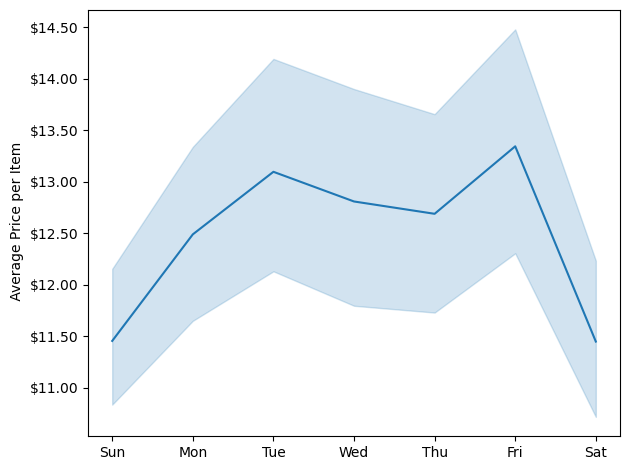

In [40]:
#Create line chart from 'small' sample set for average item price by day of week

line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')


# Set custom axis labels
line.set_xlabel("")  # Set an empty string as the x-axis label
line.set_ylabel(" Average Price per Item")

# Customize the x-axis ticks and labels
custom_xticks = range(7)  # Define your custom tick positions (e.g., for days of the week)
custom_xlabels = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]  # Define your custom tick labels

line.set_xticks(custom_xticks)
line.set_xticklabels(custom_xlabels)

# Format y-axis tick labels to display dollars and cents
def format_dollars_and_cents(value, tick_number):
    dollars, cents = divmod(value, 1)
    cents = int(cents * 100)
    return f'${int(dollars):,}.{cents:02}'  # Format as dollars and cents

line.yaxis.set_major_formatter((format_dollars_and_cents))

plt.tight_layout()

# Show the plot
plt.show()

In [41]:
#Saving the line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow_include.png'))

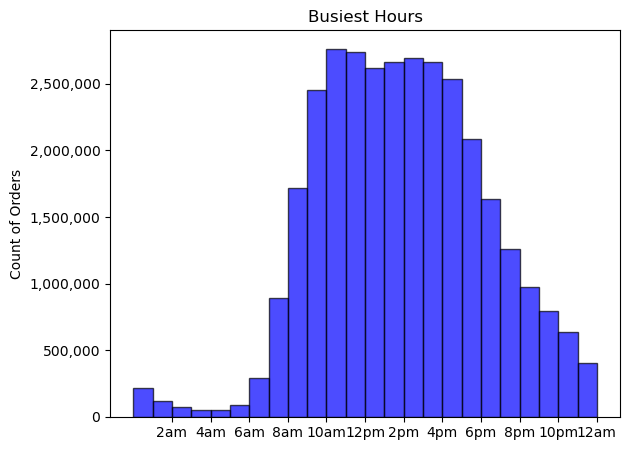

In [42]:
#Create a histogram on 'order_hour_of_day' column using 24 bins for 24 hours in a day


#Define custom bin edges to create separated bars
bins = np.arange(0, 25, 1)

hist2 = orders_products_include['order_hour_of_day'].plot.hist(bins = bins, edgecolor = 'k', alpha = 0.7, color = 'b')

#Set custom axis labels
hist2.set_xlabel(" ")
hist2.set_ylabel("Count of Orders")

#Add a title to the histogram
hist2.set_title("Busiest Hours")

#Customize the x-axis ticks and labels
custom_xticks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]  
#Define your custom tick positions
custom_xlabels = ['2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm', '12am']  

#Define your custom tick labels
hist2.set_xticks(custom_xticks)
hist2.set_xticklabels(custom_xlabels)

# Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format as integers with thousands separators

hist2.yaxis.set_major_formatter((format_func))

plt.tight_layout()

# Show the plot
plt.show()

In [43]:
#Saving the histogram (hist2)

hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day_include.png'))

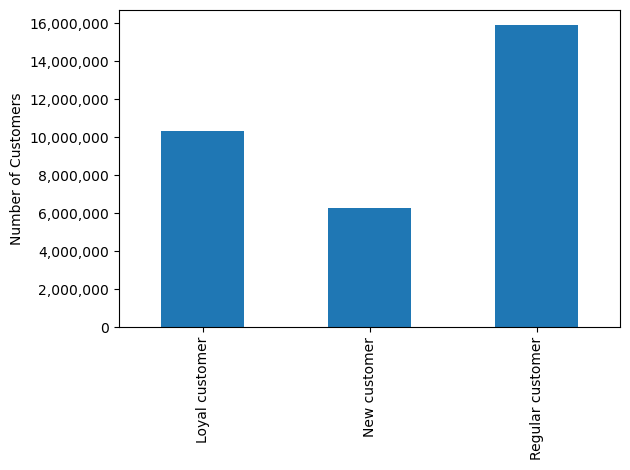

In [44]:
#Create bar chart from 'loyalty_flag' column

bar2 = orders_products_include['loyalty_flag'].value_counts().sort_index().plot.bar()

#Set custom axis labels
bar2.set_xlabel("")
bar2.set_ylabel("Number of Customers")

#Format y-axis tick labels to display full numbers
def format_func(value, tick_number):
    return f'{int(value):,}'  # Format as integers with thousands separators

bar2.yaxis.set_major_formatter((format_func))

plt.tight_layout()

plt.show()


In [45]:
#Saving bar chart (bar2)

bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_include.png'))

In [46]:
#Create smaller data frame with only needed columns for line chart

df_1 = small[['order_hour_of_day','prices']]

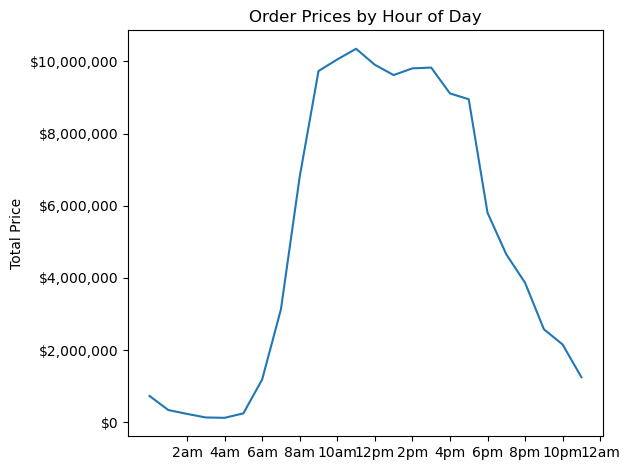

In [47]:
#Create line chart for prices by hour of the day using the 'small' data set.

#Calculate the total prices per hour of the day
total_prices_per_hour = df_1.groupby('order_hour_of_day')['prices'].sum().reset_index()

#Create line chart from 'small' sample set
line1 = sns.lineplot(data=total_prices_per_hour, x='order_hour_of_day', y='prices')

#Set custom axis labels
line1.set_xlabel("") 
line1.set_ylabel("Total Price")

#Add a title to the line graph
line1.set_title("Order Prices by Hour of Day")

#Customize the x-axis ticks and labels
custom_xticks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]  # Define your custom tick positions
custom_xlabels = ['2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm', '12am']  # Define your custom tick labels

line1.set_xticks(custom_xticks)
line1.set_xticklabels(custom_xlabels)

#Format y-axis tick labels to display dollars
def format_dollars(value, tick_number):
    dollars = int(value)
    return f'${dollars:,}'  # Include the dollar sign and format as dollars

line1.yaxis.set_major_formatter((format_dollars))

plt.tight_layout()

# Show the plot
plt.show()

In [48]:
#Save line graph (line1)

line1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_by_hour_include.png'))

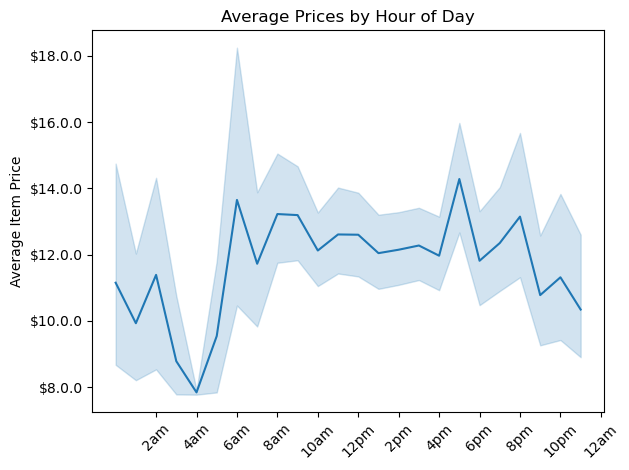

In [49]:
#Create line chart to visualize the average item price per hour

line2 = sns.lineplot(data=df_1, x='order_hour_of_day', y='prices')

#Set custom axis labels
plt.xlabel("")
plt.ylabel("Average Item Price")

#Add a title to the line graph
line2.set_title("Average Prices by Hour of Day")

#Customize the x-axis ticks and labels
custom_xticks = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
custom_xlabels = ['2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm', '12am']

line2.set_xticks(custom_xticks)
line2.set_xticklabels(custom_xlabels)

plt.xticks(custom_xticks, custom_xlabels, rotation=45)  # Rotate x-axis labels for readability

#Format y-axis tick labels to display dollars and cents (rounded to 2 decimal places)
def format_dollars_and_cents(value, tick_number):
    dollars, cents = divmod(value, 1)
    cents = round(cents * 100, 2)  # Round to 2 decimal places
    return f'${int(dollars):,}.{cents:02}'  # Include the dollar symbol and format as dollars and cents

line2.yaxis.set_major_formatter((format_dollars_and_cents))


plt.tight_layout()

# Show the plot
plt.show()

In [50]:
#Save line graph (line2)

line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_by_hour_include2.png'))

In [51]:
#Create smaller data frame with only needed columns for line chart

df_3 = small[['age', 'number_of_dependents']]

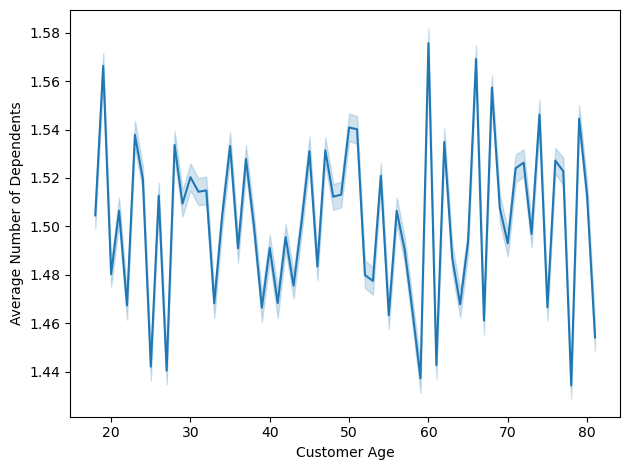

In [52]:
#Create line chart from 'small' sample set for average number of dependents by customer age.

line2 = sns.lineplot(data = df_3, x = 'age',y = 'number_of_dependents')

#Set custom axis labels
line2.set_xlabel("Customer Age")  # Set an empty string as the x-axis label
line2.set_ylabel("Average Number of Dependents")

plt.tight_layout()

# Show the plot
plt.show()

In [53]:
#Save line graph (line2)

line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_and_dep_include.png'))